In [35]:
from datetime import datetime
from pprint import pprint
import numpy as np
import pandas as pd
import scipy
import pickle

from one.api import ONE
from brainbox.io.one import SessionLoader, EphysSessionLoader
from iblatlas.atlas import AllenAtlas
from brainbox.io.one import SpikeSortingLoader

ba = AllenAtlas(res_um=10)

from brainbox.processing import bincount2D
import seaborn as sns

import matplotlib.pyplot as plt

from os.path import join
import os

from pathlib import Path
from psychedelic_functions import paths

path_dict = paths()

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.colors as mcolors

mode = 'auto'  # sets mode for all queries (one.seach* methods)
one = ONE(mode=mode)

In [36]:
run -i fetch_dataset.py

Querying database...
Fetching protocol timings...


  3%|▎         | 1/29 [00:00<00:27,  1.02it/s]/home/openlab/Desktop/Jaime/Code/psychedelics/psyfun/io.py:106: UserWarning: No stimulus timing found for 86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a, task 01
  warnings.warn(f"No stimulus timing found for {eid}, task {i:02d}")
 14%|█▍        | 4/29 [00:03<00:21,  1.17it/s]/home/openlab/Desktop/Jaime/Code/psychedelics/psyfun/io.py:99: UserWarning: No intervals table found for 76bae405-b169-44ba-95db-b39342f21cf0, task 01
  timings[f'replay_start_{i:02d}'] = df.loc['stop', 'taskReplay']
/home/openlab/Desktop/Jaime/Code/psychedelics/psyfun/io.py:106: UserWarning: No stimulus timing found for 76bae405-b169-44ba-95db-b39342f21cf0, task 01
  warnings.warn(f"No stimulus timing found for {eid}, task {i:02d}")
 17%|█▋        | 5/29 [00:03<00:17,  1.40it/s]/home/openlab/Desktop/Jaime/Code/psychedelics/psyfun/io.py:99: UserWarning: No intervals table found for 90b53484-ed3d-4f62-9dc7-64170e4941ba, task 00
  timings[f'replay_start_{i:02d}'] = df.loc['stop', 

Fetching spike sorting data...


  0%|          | 0/48 [00:00<?, ?it/s]

Good clusters for PID 7da0f609...: 61 / 1610


  4%|▍         | 2/48 [00:06<02:27,  3.20s/it]

Good clusters for PID b33386fc...: 24 / 1541
Good clusters for PID a4d69060...: 116 / 1670


  6%|▋         | 3/48 [00:11<03:03,  4.08s/it]

Good clusters for PID b0b6a756...: 127 / 1597


 10%|█         | 5/48 [00:19<02:49,  3.95s/it]

Good clusters for PID 351ee92a...: 25 / 1528
Good clusters for PID d6970b50...: 63 / 1518


 12%|█▎        | 6/48 [00:23<02:51,  4.08s/it]

Good clusters for PID 385d74d9...: 156 / 1804


 15%|█▍        | 7/48 [00:28<02:52,  4.20s/it]

Good clusters for PID b74fd045...: 73 / 1621


 17%|█▋        | 8/48 [00:32<02:47,  4.18s/it]

Good clusters for PID 5ccc2e14...: 72 / 1455


 19%|█▉        | 9/48 [00:36<02:34,  3.97s/it]

Good clusters for PID 666bcba6...: 153 / 1662


 21%|██        | 10/48 [00:40<02:41,  4.25s/it]

Good clusters for PID 51323b8e...: 118 / 1643


 23%|██▎       | 11/48 [00:45<02:36,  4.23s/it]

Good clusters for PID 9bea4082...: 64 / 1589


 25%|██▌       | 12/48 [00:48<02:23,  3.98s/it]

Good clusters for PID f529221f...: 132 / 1679


 29%|██▉       | 14/48 [00:53<01:38,  2.90s/it]

Good clusters for PID 73860622...: 40 / 1521


 31%|███▏      | 15/48 [00:56<01:43,  3.13s/it]

Good clusters for PID 83099467...: 138 / 1657


 33%|███▎      | 16/48 [01:01<01:52,  3.52s/it]

Good clusters for PID b2e7b6f5...: 115 / 1659


 35%|███▌      | 17/48 [01:05<01:53,  3.67s/it]

Good clusters for PID 101a25f8...: 85 / 1684


 38%|███▊      | 18/48 [01:08<01:51,  3.72s/it]

Good clusters for PID 1286797b...: 95 / 1615


 42%|████▏     | 20/48 [01:16<01:42,  3.66s/it]

Good clusters for PID ce4407c5...: 49 / 1620
Good clusters for PID fd2615ba...: 60 / 1556


 44%|████▍     | 21/48 [01:19<01:38,  3.64s/it]

Good clusters for PID a5c59236...: 65 / 1533


 46%|████▌     | 22/48 [01:23<01:35,  3.66s/it]

Good clusters for PID cc60f7b8...: 71 / 1652


 50%|█████     | 24/48 [01:27<01:02,  2.58s/it]

Good clusters for PID 40eb6578...: 32 / 1600


 52%|█████▏    | 25/48 [01:30<01:05,  2.86s/it]

Good clusters for PID 0d8aef21...: 58 / 1592


 54%|█████▍    | 26/48 [01:34<01:07,  3.06s/it]

Good clusters for PID 61d2d753...: 31 / 1571


 58%|█████▊    | 28/48 [01:41<01:05,  3.27s/it]

Good clusters for PID 1bba4c70...: 25 / 1521
Good clusters for PID b29e04b6...: 89 / 1656


 62%|██████▎   | 30/48 [01:45<00:43,  2.40s/it]

Good clusters for PID 9d0062d1...: 135 / 1646


 67%|██████▋   | 32/48 [01:52<00:47,  2.96s/it]

Good clusters for PID 4eaaff3b...: 13 / 1546
Good clusters for PID 540ea29f...: 117 / 1605


 69%|██████▉   | 33/48 [01:56<00:51,  3.44s/it]

Good clusters for PID 9523391b...: 46 / 1565


 71%|███████   | 34/48 [02:00<00:50,  3.63s/it]local file size mismatch on dataset: mainenlab/Subjects/ZFM-05725/2023-01-31/001/alf/probe00/pykilosort/clusters.metrics.pqt
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-05725/2023-01-31/001/alf/probe00/pykilosort/clusters.metrics.pqt: 100%|██████████| 81.8k/81.8k [00:00<00:00, 126kB/s]
 73%|███████▎  | 35/48 [02:04<00:46,  3.54s/it]

Good clusters for PID 1a137e13...: 53 / 1541


 75%|███████▌  | 36/48 [02:08<00:43,  3.65s/it]

Good clusters for PID 01b2c8cd...: 76 / 1541


 77%|███████▋  | 37/48 [02:11<00:39,  3.56s/it]

Good clusters for PID 31e88aa5...: 73 / 1629


 79%|███████▉  | 38/48 [02:15<00:35,  3.58s/it]

Good clusters for PID 3811443c...: 112 / 1749


 85%|████████▌ | 41/48 [02:22<00:20,  2.88s/it]

Good clusters for PID 23706cf9...: 20 / 1547
Good clusters for PID 387de168...: 64 / 1572


 88%|████████▊ | 42/48 [02:27<00:20,  3.35s/it]

Good clusters for PID 8eb4026a...: 72 / 1564


 90%|████████▉ | 43/48 [02:31<00:18,  3.60s/it]

Good clusters for PID dc0b7750...: 43 / 1556


 92%|█████████▏| 44/48 [02:35<00:14,  3.63s/it]

Good clusters for PID 5e941562...: 73 / 1576


 94%|█████████▍| 45/48 [02:39<00:11,  3.78s/it]

Good clusters for PID d46ba0cb...: 125 / 1751


 98%|█████████▊| 47/48 [02:43<00:02,  2.74s/it]

Good clusters for PID a359c636...: 94 / 1579


100%|██████████| 48/48 [02:47<00:00,  3.50s/it]


In [37]:
df_meta = pd.read_csv('./metadata/metadata.csv')
df_meta

,rec_day,date,animal_ID,weight,stock_uL,saline_uL,administration_method,administration_time,alyx_registration
0,1,07.12.2022,ZFM-05486,28.8,86.4,113.6,Catheter,0:20:00,Error
1,1,08.12.2022,ZFM-05496,23.1,69.3,130.7,Catheter,0:18:15,Completed
2,2,15.12.2022,ZFM-05486,29.3,87.9,112.1,Catheter,0:19:33,Completed
3,2,15.12.2022,ZFM-05496,23.6,70.8,129.2,Catheter,0:18:20,Error
4,1,24.01.2023,ZFM-05725,27.2,81.6,118.4,Catheter,0:20:21,Completed
5,1,25.01.2023,ZFM-05727,27.3,81.9,118.1,Catheter,0:17:11,Completed
6,2,31.01.2023,ZFM-05725,27.3,81.9,118.1,Catheter,0:17:43,Completed
7,2,01.02.2023,ZFM-05727,27.4,82.2,117.9,Catheter,0:17:48,Completed
8,3,07.02.2023,ZFM-05725,28.2,84.6,115.4,Catheter,0:18:08,Completed
9,3,08.02.2023,ZFM-05727,27.5,82.5,117.5,Catheter,0:17:45,Completed


In [39]:
df_timings = pd.read_csv('metadata/timings.csv')
df_timings

,eid,spontaneous_start_00,spontaneous_stop_00,rfm_start_00,rfm_stop_00,replay_start_00,replay_stop_00,spontaneous_start_01,spontaneous_stop_01,rfm_start_01,rfm_stop_01,replay_start_01,replay_stop_01,admin_time
0,d77dd225-f7a9-4d01-996b-82c3ae73d56c,52.456301,352.488467,364.755134,665.820531,3029.724119,1002.943729,3050.437273,3350.486471,3362.753138,3663.834733,4042.941732,3999.650062,1047
1,86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a,60.581288,360.630553,372.897220,673.945918,3076.041320,1010.011122,3096.895660,3396.944591,3409.211258,3710.259923,4034.342125,NaN,1111
2,4b398979-c54c-498f-a3d4-b201c2285be5,192.993812,493.059209,505.325876,806.408238,3081.895068,1149.644457,3102.680914,3402.730013,3414.996680,3716.062143,4073.404452,4059.372622,1184
3,6dc3fee9-6bfc-4daf-a70f-d726ac2fcfde,68.303716,368.352781,380.619448,681.684678,3045.907000,1024.891867,3066.685281,3366.717948,3378.984615,3680.049745,4173.635928,4023.264667,1054
4,76bae405-b169-44ba-95db-b39342f21cf0,92.996246,393.045345,405.312012,706.394107,3302.520336,1049.714318,NaN,NaN,NaN,NaN,NaN,NaN,1447
5,90b53484-ed3d-4f62-9dc7-64170e4941ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068
6,50322fbb-5b93-46d7-9ca0-391fa30c966a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1240
7,731a5f76-c4d6-4485-8584-7adeecdd6f3a,89.699943,389.748741,402.015408,703.081238,2933.648794,1038.976459,NaN,NaN,NaN,NaN,NaN,NaN,1071
8,aff40fef-7ef3-4e7a-9451-f248e6d385db,92.489430,392.555194,404.821861,705.887391,2968.815543,1042.197770,2989.578826,3289.627991,3301.894658,3602.959888,4165.659292,3938.842943,1094
9,8057374c-baf2-4391-b290-e88743d8981a,NaN,NaN,NaN,NaN,NaN,NaN,2970.087808,3270.119742,3282.386409,3583.452272,3947.555005,3926.733121,1077


In [40]:
df_spikes = pd.read_pickle('data/spike_times.pkl')
df_spikes

,channels,depths,cluster_id,amp_max,amp_min,amp_median,amp_std_dB,contamination,contamination_alt,drift,...,z,acronym,atlas_id,axial_um,lateral_um,rawInd,pid,eid,probe,spike_times
uuids,,,,,,,,,,,,,,,,,,,,,
b11878eb-677b-4182-80e4-009d1fdd8d60,14,160.0,54,0.000341,0.000081,0.000134,1.934957,0.023501,0.024961,61823.820872,...,-0.004129,CA1,382,160.0,59.0,14.0,7da0f609-e432-4773-9d6a-40e06a3b206a,d77dd225-f7a9-4d01-996b-82c3ae73d56c,probe00,"[0.05102748628556558, 0.07516072877839254, 0.2..."
4dd832ff-f1bb-4849-9f80-99d1a3e3431f,14,160.0,55,0.000449,0.000060,0.000156,2.527189,0.109517,0.114562,22514.550761,...,-0.004129,CA1,382,160.0,59.0,14.0,7da0f609-e432-4773-9d6a-40e06a3b206a,d77dd225-f7a9-4d01-996b-82c3ae73d56c,probe00,"[0.4584926192031303, 0.5780255025999222, 0.906..."
074b0890-41fe-4133-975d-10be802914e0,16,180.0,67,0.000207,0.000038,0.000100,2.396366,1.107142,0.617039,5415.304123,...,-0.004110,CA1,382,180.0,43.0,16.0,7da0f609-e432-4773-9d6a-40e06a3b206a,d77dd225-f7a9-4d01-996b-82c3ae73d56c,probe00,"[77.48790399550484, 81.5961553538064, 160.8169..."
ccebc984-f45c-4c7c-87ff-5953c66f342a,21,220.0,93,0.000240,0.000095,0.000131,0.867436,1.163497,0.654950,2837.458662,...,-0.004070,CA1,382,220.0,11.0,21.0,7da0f609-e432-4773-9d6a-40e06a3b206a,d77dd225-f7a9-4d01-996b-82c3ae73d56c,probe00,"[1.1791565732016371, 9.338059195417479, 51.839..."
5b05d7dc-a06c-4796-a37e-f6268e145667,21,220.0,105,0.000210,0.000057,0.000100,1.156440,0.050251,0.044829,75105.848885,...,-0.004070,CA1,382,220.0,11.0,21.0,7da0f609-e432-4773-9d6a-40e06a3b206a,d77dd225-f7a9-4d01-996b-82c3ae73d56c,probe00,"[0.08762734851916226, 0.182360325265867, 0.192..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cc770f2c-62a6-4535-a048-a6781454c6fe,114,1160.0,1507,0.000200,0.000052,0.000099,1.490393,0.099829,0.085690,126929.802006,...,-0.003386,MD,362,1160.0,59.0,114.0,a359c636-17de-4151-8dc7-9fc78d0db374,1bc4aea6-c6fa-4cb8-882f-ea1cc4a12667,probe00,"[4.019043491498008, 10.434884199747808, 23.673..."
93d93aed-6433-49b7-b041-b2f695eed9ea,129,1300.0,1517,0.000307,0.000054,0.000129,1.329069,0.000000,0.000000,18081.898298,...,-0.003257,MD,362,1300.0,11.0,129.0,a359c636-17de-4151-8dc7-9fc78d0db374,1bc4aea6-c6fa-4cb8-882f-ea1cc4a12667,probe00,"[0.1864923312887502, 0.3271250956235551, 1.314..."
f0ff19bd-1736-46d7-91c0-215e2deccf89,133,1340.0,1521,0.000228,0.000059,0.000133,1.171254,0.000000,0.000000,22915.368490,...,-0.003218,MD,362,1340.0,11.0,133.0,a359c636-17de-4151-8dc7-9fc78d0db374,1bc4aea6-c6fa-4cb8-882f-ea1cc4a12667,probe00,"[1.0507888343551535, 1.103088622750818, 7.9372..."


In [43]:
df_spikes.columns

Index(['channels', 'depths', 'cluster_id', 'amp_max', 'amp_min', 'amp_median',
       'amp_std_dB', 'contamination', 'contamination_alt', 'drift',
       'missed_spikes_est', 'noise_cutoff', 'presence_ratio',
       'presence_ratio_std', 'slidingRP_viol', 'spike_count', 'firing_rate',
       'label', 'ks2_label', 'x', 'y', 'z', 'acronym', 'atlas_id', 'axial_um',
       'lateral_um', 'rawInd', 'pid', 'eid', 'probe', 'spike_times'],
      dtype='object')


In [4]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def power_law(x, alpha):
        return 1 / (x ** alpha)

def linear_function(x, alpha, b):
        return alpha * x + b

def exponential (x, alpha, b):
        return alpha * np.exp(b*x)

def load_good_units (pid):
        print ('pid:', pid)
        eid_timings = df_timings_spontaneous.loc[df_timings_spontaneous['eid']==eid]
        dir = Path (f'./Data/eids/{eid}/{pid}')
        dir.mkdir (parents=True, exist_ok=True)

        spikes_file = Path (f'./Data/eids/{eid}/{pid}/spikes.pkl')
        clusters_file = Path (f'./Data/eids/{eid}/{pid}/clusters.pkl')
        channels_file = Path (f'./Data/eids/{eid}/{pid}/channels.pkl')

        if spikes_file.exists() and clusters_file.exists() and channels_file.exists():
                with spikes_file.open('rb') as f:
                        print (f'Loading spikes from file at ./Data/eids/{eid}/{pid}/spikes.pkl')
                        spikes = pickle.load(f)
                with clusters_file.open('rb') as f:
                        print (f'Loading clusters from file at ./Data/eids/{eid}/{pid}/clusters.pkl')
                        clusters = pickle.load(f)
                with channels_file.open('rb') as f:
                        print (f'Loading channels from file at ./Data/eids/{eid}/{pid}/channels.pkl')        
                        channels = pickle.load(f)    
        else:
                print('No local files found, loading with SpikeSortingLoader')
                sl = SpikeSortingLoader(pid=pid, one=one, atlas=ba)
                spikes, clusters, channels = sl.load_spike_sorting()
                clusters = sl.merge_clusters(spikes, clusters, channels)
                with spikes_file.open('wb') as f:
                        print (f'Saving spikes to file at ./Data/eids/{eid}/{pid}/spikes.pkl')
                        pickle.dump(spikes, f)
                with clusters_file.open('wb') as f:
                        print (f'Saving clusters to file at ./Data/eids/{eid}/{pid}/clusters.pkl')
                        pickle.dump(clusters, f)
                with channels_file.open('wb') as f:
                        print (f'Saving channels to file at ./Data/eids/{eid}/{pid}/channels.pkl')        
                        pickle.dump(channels, f)

        print('Finished loading spikes, clusters and channels')

        # Only keep IBL good neurons
        spikes.times = spikes.times[np.isin(spikes.clusters, clusters.cluster_id[clusters.label == 1])]
        spikes.depths = spikes.depths[np.isin(spikes.clusters, clusters.cluster_id[clusters.label == 1])]
        spikes.clusters = spikes.clusters[np.isin(spikes.clusters, clusters.cluster_id[clusters.label == 1])]
        return spikes, clusters, channels

def plot_rasters (pid, spikes, clusters, channels, eid_timings):
        # Convert to mm
        spikes.depths = spikes.depths / 1000
        # Get spike raster
        iok = ~np.isnan(spikes.depths)
        R, times, depths = bincount2D(spikes.times[iok], spikes.depths[iok], xbin=0.01, ybin=0.02, weights=None)
        # %% Plot figure
        f, ax1 = plt.subplots(1, 1, figsize=(5, 2.5), dpi=300)
        ax1.imshow(R, aspect='auto', cmap='binary', vmin=0, vmax=np.std(R),
                extent=np.r_[times[[0, -1]], depths[[0, -1]]], origin='upper')
        ax1.set(ylim=[0, 4], ylabel='Depth (mm)')
        #ax1.set_title('Awake', color=colors['awake'], fontweight='bold')
        ax1.set(xticks=[ax1.get_xlim()[0] + 60, ax1.get_xlim()[0] + 660])
        ax1.text(ax1.get_xlim()[0] + 350, 4.3, '10 min', ha='center', va='center')
        ax1.axes.get_xaxis().set_visible(False)
        ax1.invert_yaxis()

        for i in np.arange(1, channels['acronym'].shape[0], 50):
                ax1.text(ax1.get_xlim()[-1]+50, channels['axial_um'][channels['acronym'].shape[0] - i] / 1000,
                channels['acronym'][i], fontsize=8)
        for key in eid_timings:
                print (key, ':', eid_timings[key].values[0])
                if key != 'eid':
                        ax1.axvline(eid_timings[key].values[0], color = "red", linewidth=0.2) # add linewidth parameter to make lines thinner
                        ax1.text(eid_timings[key].values[0], ax1.get_ylim()[0]-4, key, ha ='left', rotation = 45 ,color = "red", fontsize = 3) # adjust position and rotation of text
        plt.tight_layout()
        sns.despine(trim=True, offset=2)

        # plt.savefig(join(path_dict['fig_path'], 'example_raster.pdf'))
        start_index_00 = find_nearest(times, eid_timings['spontaneous_start_00'].values[0])
        stop_index_00 = find_nearest(times, eid_timings['spontaneous_stop_00'].values[0])
        start_index_01 = find_nearest(times, eid_timings['spontaneous_start_01'].values[0])
        stop_index_01 = find_nearest(times, eid_timings['spontaneous_stop_01'].values[0])
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

        spontaneous_activity_00 = R[:, start_index_00:stop_index_00]
        spontaneous_activity_01 = R[:, start_index_01:stop_index_01]


        im1 = ax1.imshow(spontaneous_activity_00, 
                aspect='auto', cmap='binary', vmin=0, vmax=np.std(R), 
                extent=np.r_[times[[start_index_00, stop_index_00-1]], depths[[0, -1]]], origin='upper')
        ax1.set_title('Spontaneous Activity #1')

        im2 = ax2.imshow(spontaneous_activity_01, 
                aspect='auto', cmap='binary', vmin=0, vmax=np.std(R), 
                extent=np.r_[times[[start_index_01, stop_index_01-1]], depths[[0, -1]]], origin='upper')
        ax2.set_title('Spontaneous Activity #2')

        # display the plot
        plt.show()
        plt.close()

def load_spontaneous_activity(spikes, eid_timings):
    # Convert AlfBunch to DataFrame
    spikes_df = pd.DataFrame(spikes)
    
    select_00 = (spikes_df.times >= eid_timings['spontaneous_start_00'].values[0]) & \
                (spikes_df.times <= eid_timings['spontaneous_stop_00'].values[0])
    select_01 = (spikes_df.times >= eid_timings['spontaneous_start_01'].values[0]) & \
                (spikes_df.times <= eid_timings['spontaneous_stop_01'].values[0])

    spontaneous_activity_00 = spikes_df.loc[select_00]
    spontaneous_activity_01 = spikes_df.loc[select_01]

    return spontaneous_activity_00, spontaneous_activity_01

In [5]:
def run_PCA(spontaneous_activity_00, spontaneous_activity_01):
        # perform PCA to get the first three components
        pca = PCA(n_components=20)
        pca_result_00 = pca.fit_transform(spontaneous_activity_00.T)  # transpose to make timestamp as row
        explained_variance_00 = pca.explained_variance_ratio_ # save the explained variance for 00

        pca_result_01 = pca.fit_transform(spontaneous_activity_01.T)  # transpose to make timestamp as row
        explained_variance_01 = pca.explained_variance_ratio_ # save the explained variance for 01

        fig = plt.figure(figsize = (16,8))


        # Create a 2x2 subplot grid
        fig, ax = plt.subplots(2, 2, figsize=(16,16))

        # create the first 3D subplot
        ax1 = fig.add_subplot(2, 2, 3, projection='3d')
        ax1.plot(pca_result_00[:,0], pca_result_00[:,1], pca_result_00[:,2], marker = 'o', alpha= 0.1)
        ax1.set_title('PCA trajectory of spontaneous activity 00 \n Pre-LSD')
        ax1.set_xlabel('PC1')
        ax1.set_ylabel('PC2')
        ax1.set_zlabel('PC3')

        # create the second 3D subplot
        ax2 = fig.add_subplot(2, 2, 4, projection='3d')
        ax2.plot(pca_result_01[:,0], pca_result_01[:,1], pca_result_01[:,2], marker = 'o', alpha= 0.1)
        ax2.set_title('PCA trajectory of spontaneous activity 01 \n Post-LSD')
        ax2.set_xlabel('PC1')
        ax2.set_ylabel('PC2')
        ax2.set_zlabel('PC3')

        # Create the first scree plot
        ax[0, 0].bar(np.arange(1,len(explained_variance_00)+1), explained_variance_00)
        ax[0, 0].set_title('Scree plot of spontaneous activity 00 \n Pre-LSD')
        ax[0, 0].set_xlabel('Principal Component')
        ax[0, 0].set_ylabel('Variance Explained (%)')

        # Create the second scree plot 
        ax[0, 1].bar(np.arange(1,len(explained_variance_01)+1), explained_variance_01)
        ax[0, 1].set_title('Scree plot of spontaneous activity 01 \n Post-LSD')
        ax[0, 1].set_xlabel('Principal Component')
        ax[0, 1].set_ylabel('Variance Explained (%)')

        plt.tight_layout()
        plt.show()
        plt.close()


        
        # Create plot
        fig, ax = plt.subplots(figsize=(10,8))

        # Add plots
        ax.plot(np.arange(1,len(explained_variance_00)+1), explained_variance_00, marker='o', label='Pre-LSD')
        ax.plot(np.arange(1,len(explained_variance_01)+1), explained_variance_01, marker='o', label='Post-LSD')

        # Set labels and title
        ax.set_title('Scree plot of spontaneous activity \n Pre-LSD vs Post-LSD')
        ax.set_xlabel('Principal Component')
        ax.set_ylabel('Variance Explained (%)')

        # Add legend to differentiate the lines
        ax.legend()

        # Show the plot
        plt.show()
        plt.close()


        # # Calculate power-law fit alpha for each dataset
        # alpha_00, _ = scipy.optimize.curve_fit(power_law, np.arange(1,len(explained_variance_00)+1), explained_variance_00) 
        # alpha_01, _ = scipy.optimize.curve_fit(power_law, np.arange(1,len(explained_variance_01)+1), explained_variance_01)


        # Calculate power-law fit alpha for each dataset
        [alpha_00, b00], _ = scipy.optimize.curve_fit(exponential, np.arange(1,len(explained_variance_00)+1), explained_variance_00) 
        [alpha_01, b01], _ = scipy.optimize.curve_fit(exponential, np.arange(1,len(explained_variance_01)+1), explained_variance_01)


        alphas = [[alpha_00, b00], [alpha_01, b01]]

        # x array for generating y_fit
        x_fit = np.arange(1, len(explained_variance_00)+1)

        # Generate prediction lines
        y_fit_00 = exponential(x_fit, alpha_00, b00)
        y_fit_01 = exponential(x_fit, alpha_01, b01)

        # Create the plot
        fig, ax = plt.subplots(figsize=(10,8))

        # Add original data plots
        ax.plot(x_fit, explained_variance_00, marker='o', label='Pre-LSD')
        ax.plot(x_fit, explained_variance_01, marker='o', label='Post-LSD')

        # Add prediction lines
        ax.plot(x_fit, y_fit_00, color='blue', label=f'Power-law fit Pre-LSD: alpha={alpha_00:.2f}')
        ax.plot(x_fit, y_fit_01, color='orange', label=f'Power-law fit Post-LSD: alpha={alpha_01:.2f}')

        # Set labels and title
        ax.set_title('Scree plot of spontaneous activity \n Pre-LSD vs Post-LSD')
        ax.set_xlabel('Principal Component')
        ax.set_ylabel('Variance Explained (%)')

        # Add legend to differentiate the lines
        ax.legend()

        # Show the plot
        plt.show()
        plt.close()
        return alphas, pca_result_00, explained_variance_00, pca_result_01, explained_variance_01

In [7]:
pid = '7da0f609-e432-4773-9d6a-40e06a3b206a'
sl = SpikeSortingLoader(pid=pid, one=one, atlas=ba)
spikes, clusters, channels = sl.load_spike_sorting()

pid: 7da0f609-e432-4773-9d6a-40e06a3b206a
Loading spikes from file at ./Data/eids/d77dd225-f7a9-4d01-996b-82c3ae73d56c/7da0f609-e432-4773-9d6a-40e06a3b206a/spikes.pkl
Loading clusters from file at ./Data/eids/d77dd225-f7a9-4d01-996b-82c3ae73d56c/7da0f609-e432-4773-9d6a-40e06a3b206a/clusters.pkl
Loading channels from file at ./Data/eids/d77dd225-f7a9-4d01-996b-82c3ae73d56c/7da0f609-e432-4773-9d6a-40e06a3b206a/channels.pkl
Finished loading spikes, clusters and channels
eid : d77dd225-f7a9-4d01-996b-82c3ae73d56c
spontaneous_start_00 : 52.45630068464166
spontaneous_stop_00 : 352.48846745576327
rfm_start_00 : 364.75513434495394
rfm_stop_00 : 665.8205311160766
replay_start_00 : 3029.72411862303
replay_stop_00 : 1002.943728931003
spontaneous_start_01 : 3050.43727260764
spontaneous_stop_01 : 3350.4864710087613
rfm_start_01 : 3362.753137897952
rfm_stop_01 : 3663.834733049074
replay_start_01 : 4042.941732064043
replay_stop_01 : 3999.650061664
admin_time : 1047.0


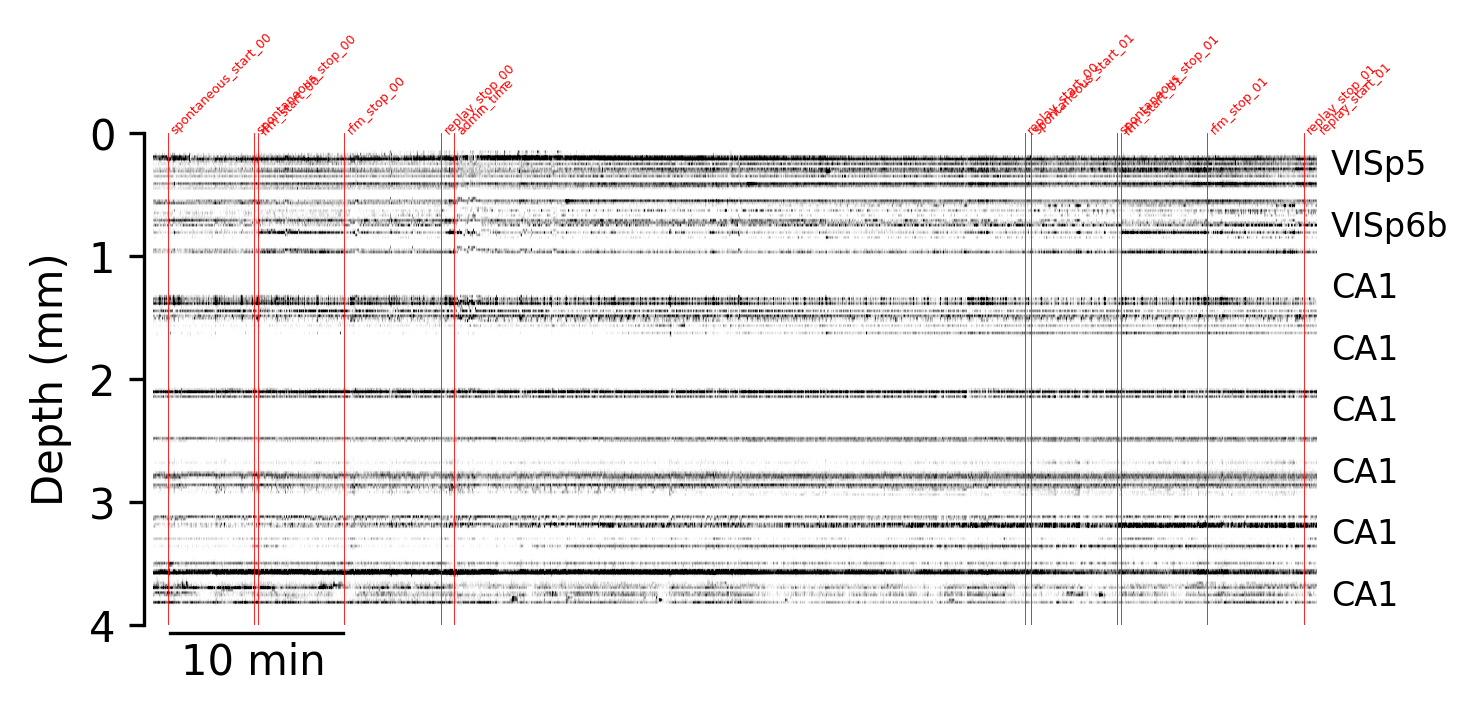

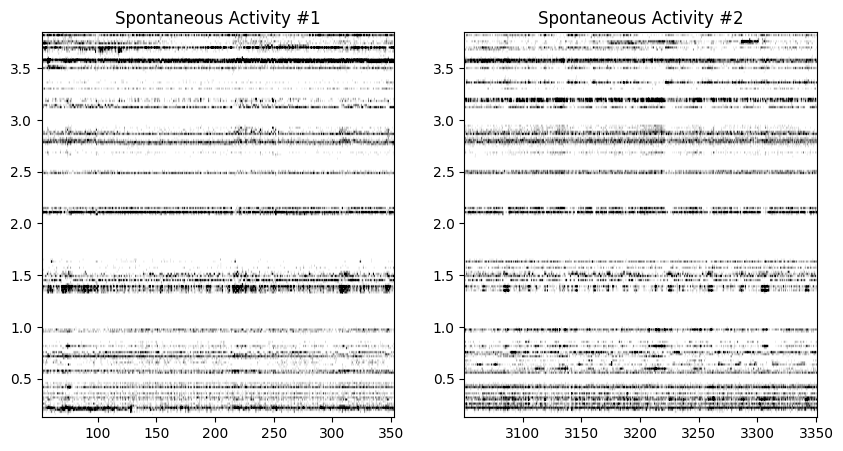

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [25]:
for eid in df_timings_spontaneous['eid']:
    eid_timings = df_timings_spontaneous[df_timings_spontaneous['eid']==eid]
    for pid in one.eid2pid(eid)[0]:
        spikes, clusters, channels = load_good_units(pid)
        plot_rasters (pid, spikes, clusters, channels, eid_timings)
        spontaneous_activity_00, spontaneous_activity_01 = load_spontaneous_activity (spikes, eid_timings)
        run_PCA(spontaneous_activity_00, spontaneous_activity_01)
        break
    break


In [ ]:
power_laws = []
per_session_pca = []
PCAs_per_eid = {}
for eid in df_timings_spontaneous['eid']:
    try:
        spontaneous_activity_00, spontaneous_activity_01 = load_rasters(eid)
        PCAs_per_eid[f'{eid}'] = run_PCA(spontaneous_activity_00, spontaneous_activity_01)
        power_laws.append(alphas)
        per_session_pca.append (alphas, pca_result_00, explained_variance_00, pca_result_01, explained_variance_01)
        break
    except AttributeError:
        print(f"An error occurred with {eid}. Skipping to the next one.")
        continue

NameError: name 'load_rasters' is not defined

ValueError: x and y must be the same size

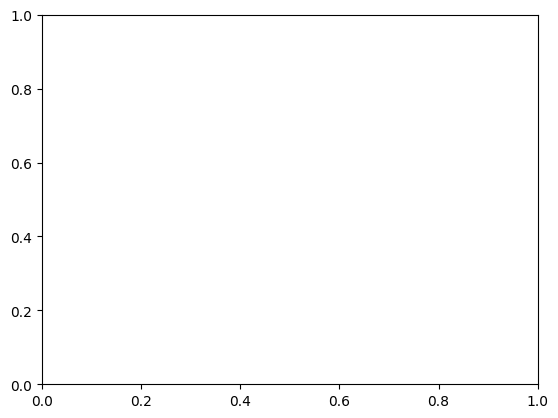

In [214]:
import matplotlib.pyplot as plt
import numpy as np

# Generate array for x coordinates
x_coords_pre = [1] * len(power_laws)  # Let's say 'Pre-LSD' points are at x=1
x_coords_post = [2] * len(power_laws)  # and 'Post-LSD' points are at x=2

# Extract 'Pre-LSD' and 'Post-LSD' points
pre_lsd = [entry[0] for entry in power_laws]
post_lsd = [entry[1] for entry in power_laws]

# Calculate the mean (average) values
mean_pre_lsd = np.mean(pre_lsd)
mean_post_lsd = np.mean(post_lsd)

# Create a new figure and axis
fig, ax = plt.subplots()

# Add scatter plots
ax.scatter(x_coords_pre, pre_lsd, label='Pre-LSD')
ax.scatter(x_coords_post, post_lsd, label='Post-LSD')

# Connect each pair of points with a line
for i in range(len(pre_lsd)):
    ax.plot([1, 2], [pre_lsd[i], post_lsd[i]], color='grey', linestyle='-', linewidth=1)

# Add average points to the plot
ax.scatter(1, mean_pre_lsd, color='red', label='Average Pre-LSD')
ax.scatter(2, mean_post_lsd, color='red', label='Average Post-LSD')

# Connect average points with a line
ax.plot([1, 2], [mean_pre_lsd, mean_post_lsd], color='red')

# Set title and labels
ax.set_title('Power law fit - Alpha estimates for each session')
ax.set_xlabel('Condition')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Pre-LSD', 'Post-LSD'])
ax.set_ylabel('Alpha estimate')

# Add legend and show plot
ax.legend()
plt.show()


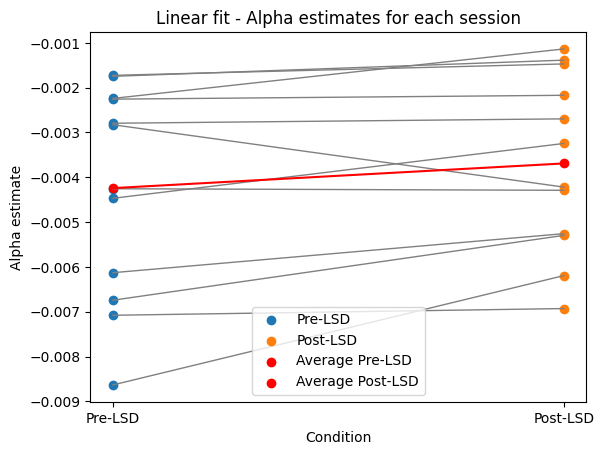

In [213]:
import matplotlib.pyplot as plt
import numpy as np

# Generate array for x coordinates
x_coords_pre = [1] * len(power_laws)  # Let's say 'Pre-LSD' points are at x=1
x_coords_post = [2] * len(power_laws)  # and 'Post-LSD' points are at x=2

# Extract 'Pre-LSD' and 'Post-LSD' points
pre_lsd = [entry[0][0] for entry in power_laws]
post_lsd = [entry[1][0] for entry in power_laws]

# Calculate the mean (average) values
mean_pre_lsd = np.mean(pre_lsd)
mean_post_lsd = np.mean(post_lsd)

# Create a new figure and axis
fig, ax = plt.subplots()

# Add scatter plots
ax.scatter(x_coords_pre, pre_lsd, label='Pre-LSD')
ax.scatter(x_coords_post, post_lsd, label='Post-LSD')

# Connect each pair of points with a line
for i in range(len(pre_lsd)):
    ax.plot([1, 2], [pre_lsd[i], post_lsd[i]], color='grey', linestyle='-', linewidth=1)

# Add average points to the plot
ax.scatter(1, mean_pre_lsd, color='red', label='Average Pre-LSD')
ax.scatter(2, mean_post_lsd, color='red', label='Average Post-LSD')

# Connect average points with a line
ax.plot([1, 2], [mean_pre_lsd, mean_post_lsd], color='red')

# Set title and labels
ax.set_title('Linear fit - Alpha estimates for each session')
ax.set_xlabel('Condition')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Pre-LSD', 'Post-LSD'])
ax.set_ylabel('Alpha estimate')

# Add legend and show plot
ax.legend()
plt.show()


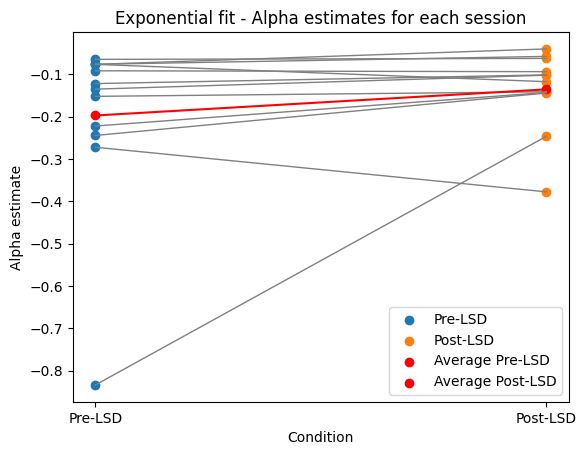

In [219]:
import matplotlib.pyplot as plt
import numpy as np

# Generate array for x coordinates
x_coords_pre = [1] * len(power_laws)  # Let's say 'Pre-LSD' points are at x=1
x_coords_post = [2] * len(power_laws)  # and 'Post-LSD' points are at x=2

# Extract 'Pre-LSD' and 'Post-LSD' points
pre_lsd = [entry[0][1] for entry in power_laws]
post_lsd = [entry[1][1] for entry in power_laws]

# Calculate the mean (average) values
mean_pre_lsd = np.mean(pre_lsd)
mean_post_lsd = np.mean(post_lsd)

# Create a new figure and axis
fig, ax = plt.subplots()

# Add scatter plots
ax.scatter(x_coords_pre, pre_lsd, label='Pre-LSD')
ax.scatter(x_coords_post, post_lsd, label='Post-LSD')

# Connect each pair of points with a line
for i in range(len(pre_lsd)):
    ax.plot([1, 2], [pre_lsd[i], post_lsd[i]], color='grey', linestyle='-', linewidth=1)

# Add average points to the plot
ax.scatter(1, mean_pre_lsd, color='red', label='Average Pre-LSD')
ax.scatter(2, mean_post_lsd, color='red', label='Average Post-LSD')

# Connect average points with a line
ax.plot([1, 2], [mean_pre_lsd, mean_post_lsd], color='red')

# Set title and labels
ax.set_title('Exponential fit - Alpha estimates for each session')
ax.set_xlabel('Condition')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Pre-LSD', 'Post-LSD'])
ax.set_ylabel('Alpha estimate')

# Add legend and show plot
ax.legend()
plt.show()


In [4]:
def basic_ephys (pid):#, pname, session_path):

    # 1. Load in spikesorting data for pid
    ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
    spikes, clusters, channels = ssl.load_spike_sorting()
    print (spikes)
    clusters = ssl.merge_clusters(spikes, clusters, channels)
    # 2. Evaluate the number of good clusters
    # The spikesortingloader loads data for all clusters (both mua and good) detected by the spikesorter.
    # We can restrict to only the good clusters by finding the clusters with a label of 1
    good_cluster_idx = clusters['label'] == 1
    print (good_cluster_idx)
    clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}

    all_clusters = clusters['label'].shape
    good_clusters = clusters_good['label'].shape
    print(f'Total no. of clusters: {all_clusters}')
    print(f'Number of good clusters: {good_clusters}')

    # 3. Find the location of clusters in brain
    # The location of the clusters can be found in the atlas_id (Allen CCF ids) or acronym attributes of the clusters object
    acronyms = clusters_good['acronym']
    unique_acronyms, count = np.unique(acronyms, return_counts=True)
    for a, c in zip(unique_acronyms, count):
        print(f'{a}: {c}')

    # 4. Compute the firing rate of each cluster
    # The firing rate of each cluster can be found in the firing rate atrribute of the clusters object
    firing_rate = clusters_good['firing_rate']

    # To show the interaction between the clusters and the spikes object we will show how you can compute
    # the firing rate from the data

    # To compute the firing rate we first need to compute the number of spikes detected for each cluster
    n_spikes = np.empty((clusters_good['cluster_id'].shape))
    # Loop over the cluster ids
    for i, c in enumerate(clusters_good['cluster_id']):
        # Find location where each cluster id is found in the spikes objects and get the sum
        cidx = np.sum(spikes['clusters'] == c)
        n_spikes[i] = cidx

    # To compute the firing rate we can divide the spike count by the total duration of the recording
    duration = np.max(spikes['times']) - np.min(spikes['times'])
    firing_rate_from_spikes = n_spikes / duration
    # Make sure that the values for firing rates are the same
    np.array_equal(firing_rate_from_spikes, firing_rate)

    # 5. Plot firing rate and brain locations
    clusters_good.keys()
    norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
    firing_rate_cols = mapper.to_rgba(firing_rate)
    fig, axs = plt.subplots(1, 2)
    # Plot the brain regions through which the channels on the insertion pass
    plot_brain_regions(channels['atlas_id'], channel_depths=channels['axial_um'], ax=axs[0])
    # Plot scatter plot of cluster depths vs cluster amp with firing rate encoded in colour
    # Map firing rate values to colours
    norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
    firing_rate_cols = mapper.to_rgba(firing_rate)
    axs[1].scatter(clusters_good['amp_median'] * 1e6, clusters_good['depths'], c=firing_rate_cols)
    axs[1].set_xlabel('Amps (uV)')
    axs[1].get_yaxis().set_visible(False)
    cbar = fig.colorbar(mapper, ax=axs[1])
    cbar.set_label('Firing rate (Hz)')
    plt.show()
    plt.close(fig)
    return {a: c for a, c in zip(unique_acronyms, count)}


In [5]:
import pandas as pd

# Assuming neurons_per_area is your dictionary

# Create a new dictionary where areas will be the keys
areas_dict = {}

for session, areas in neurons_per_area.items():
    for area, neuron_count in areas.items():
        if area not in areas_dict:
            # Create a new dictionary for each new area, with session ids as keys
            areas_dict[area] = {}
        areas_dict[area][session] = neuron_count

# Convert the dictionary to a DataFrame
df = pd.DataFrame(areas_dict).T.fillna(0)
df = df.sort_index()
df = df[df.apply(lambda row: np.count_nonzero(row) >= 3, axis=1)]

print (df)

# Create the heatmap
fig, axs = plt.subplots(1, 2, figsize=(20,20))  # Adjust the size as needed.
heatmap = axs[0].imshow(df, cmap='hot', interpolation='nearest')

# Add labels to the axes
axs[0].set_xticks(range(df.shape[1]))
axs[0].set_xticklabels(df.columns, fontsize=10, rotation=90)
axs[0].set_yticks(range(df.shape[0]))
axs[0].set_yticklabels(df.index, fontsize=10)

# Add a colorbar
cbar = fig.colorbar(heatmap, ax=axs[0], fraction=0.046, pad=0.04)
cbar.set_label('Number of neurons')

# Label axes
axs[0].set_xlabel('Session ID')
axs[0].set_ylabel('Area')

# Create the number map
numbermap = axs[1].imshow(df, cmap='Greys', interpolation='nearest')

# Add labels to the axes
axs[1].set_xticks(range(df.shape[1]))
axs[1].set_xticklabels(df.columns, fontsize=10, rotation=90)
axs[1].set_yticks(range(df.shape[0]))
axs[1].set_yticklabels(df.index, fontsize=10)

# Add the neuron counts as text
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        axs[1].text(j, i, int(df.iloc[i, j]), ha="center", va="center", color="black", fontsize = 6)

# Label axes
axs[1].set_xlabel('Session ID')
axs[1].set_ylabel('Area')

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'neurons_per_area' is not defined

In [ ]:
dataset = 'spikes.times.npy'
brain_acronym = 'MO'
psychedelic_insertions = one.search_insertions(project=['psychedelics'])
psychedelic_insertions_spikes = one.search_insertions(project=['psychedelics'], datasets=dataset)
psychedelic_insertions_spikes_area = one.search_insertions(project=['psychedelics'], datasets=dataset, atlas_acronym=brain_acronym)

print(f'{len(psychedelic_insertions)-1} insertions in psychedelic project, of which \n{len(psychedelic_insertions_spikes)-1} have a spikes.times.npy file, \n{len(psychedelic_insertions_spikes_area)-1} with areas containing {brain_acronym} in their acronym')
datasets_loaded = {}
neurons_per_area = {}
errored_sessions = []
for pid in psychedelic_insertions_spikes:
    try:
        neurons_per_area[pid] = basic_ephys (pid)    
    except Exception as e:
        errored_sessions.append(pid)
        continue
    # ssl = SpikeSortingLoader(one=one, pid=pid)
    # channels = ssl.load_channels()
    # spikes, clusters, channels = ssl.load_spike_sorting()
    # print (spikes)
#

In [50]:
np.log2(0)

/tmp/ipykernel_601065/2251961259.py:1: RuntimeWarning: divide by zero encountered in log2
  np.log2(0)


-inf

In [89]:
#From Davide
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from psychedelic_functions import fetch_spikes, _get_binned_spike_counts
from psychedelic_functions import combine_regions
from scipy.stats import entropy

df_spikes = pd.read_pickle('data/spike_times.pkl')

df_timings = pd.read_csv('metadata/timings.csv').set_index('eid')
# Keep only spikes from experiments with have valid timings
df_timings_spontaneous = df_timings[df_timings['spontaneous_start_01'].notna()]
df_timings_spontaneous = df_timings_spontaneous[df_timings_spontaneous['spontaneous_start_00'].notna()]
df_timings_spontaneous = df_timings_spontaneous[df_timings_spontaneous['replay_stop_00'].notna()]
df_timings_spontaneous
df_spikes = df_spikes[np.isin(df_spikes['eid'], df_timings_spontaneous.index)]

In [90]:
df_timings_spontaneous

,spontaneous_start_00,spontaneous_stop_00,rfm_start_00,rfm_stop_00,replay_start_00,replay_stop_00,spontaneous_start_01,spontaneous_stop_01,rfm_start_01,rfm_stop_01,replay_start_01,replay_stop_01,admin_time
eid,,,,,,,,,,,,,
d77dd225-f7a9-4d01-996b-82c3ae73d56c,52.456301,352.488467,364.755134,665.820531,3029.724119,1002.943729,3050.437273,3350.486471,3362.753138,3663.834733,4042.941732,3999.650062,1047
86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a,60.581288,360.630553,372.897220,673.945918,3076.041320,1010.011122,3096.895660,3396.944591,3409.211258,3710.259923,4034.342125,NaN,1111
4b398979-c54c-498f-a3d4-b201c2285be5,192.993812,493.059209,505.325876,806.408238,3081.895068,1149.644457,3102.680914,3402.730013,3414.996680,3716.062143,4073.404452,4059.372622,1184
6dc3fee9-6bfc-4daf-a70f-d726ac2fcfde,68.303716,368.352781,380.619448,681.684678,3045.907000,1024.891867,3066.685281,3366.717948,3378.984615,3680.049745,4173.635928,4023.264667,1054
aff40fef-7ef3-4e7a-9451-f248e6d385db,92.489430,392.555194,404.821861,705.887391,2968.815543,1042.197770,2989.578826,3289.627991,3301.894658,3602.959888,4165.659292,3938.842943,1094
53d8cb2f-3338-4bcd-81c4-6207b660eba3,85.650914,385.715944,397.982611,699.047941,3006.530638,1042.013455,3027.283022,3327.331420,3339.598087,3640.663117,4009.951331,3983.424584,1146
8868dff6-f4a6-4e84-b62c-24a0c97803c4,70.987914,371.019681,383.286348,684.368343,2926.531272,1020.182972,2947.674583,3247.723248,3259.989915,3561.071744,3942.889072,3897.047923,1073
debe9833-5c26-4d9e-89ba-c63e07e1db10,74.622784,374.688581,386.955247,688.004046,3049.913766,1023.915832,3070.655451,3370.704449,3382.971116,3684.036313,4039.450215,4020.005393,1073
7149e0fc-a52d-4e93-849c-edc22d54e7a5,52.628383,352.693514,364.960181,666.025344,2894.814311,1009.286428,2915.548829,3215.597395,3227.864061,3528.929458,3941.145379,3872.214240,1065


/tmp/ipykernel_6967/3069317831.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for idx, session in df_spikes.groupby(['eid']):


start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  sponta

/tmp/ipykernel_6967/3069317831.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_01
start:  spontaneous_start_00
start:  spontaneous_start_00
start:  sponta

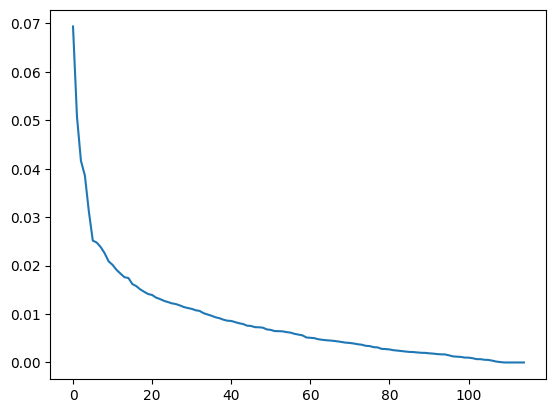

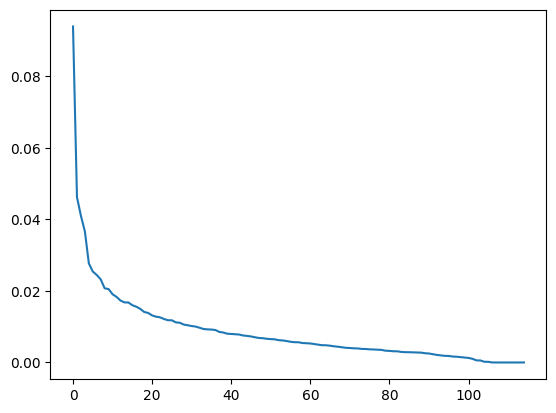

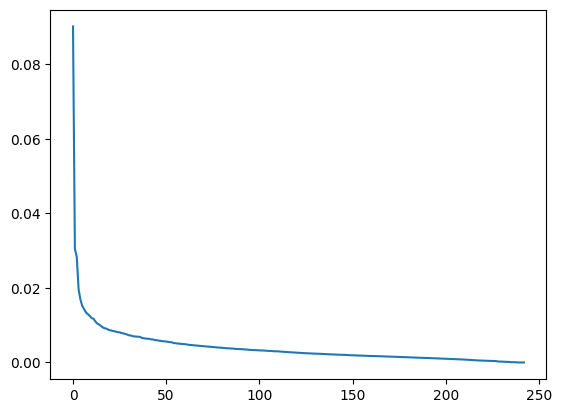

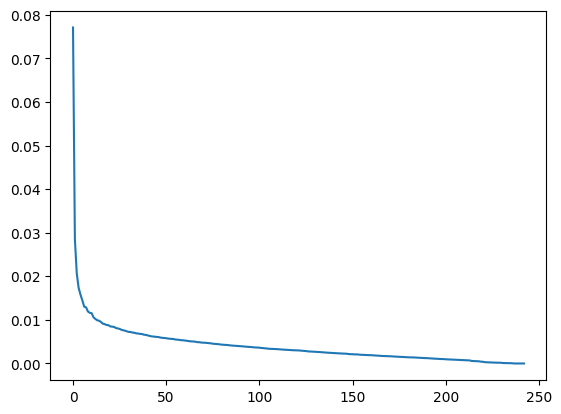

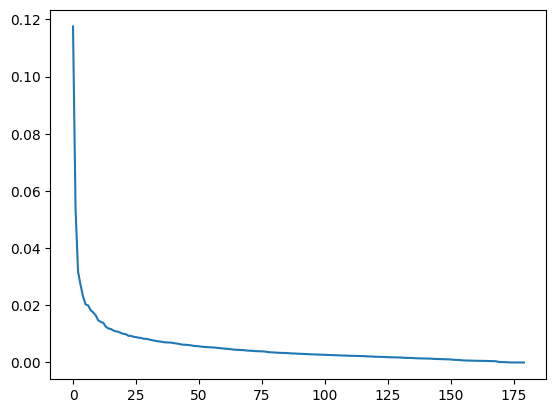

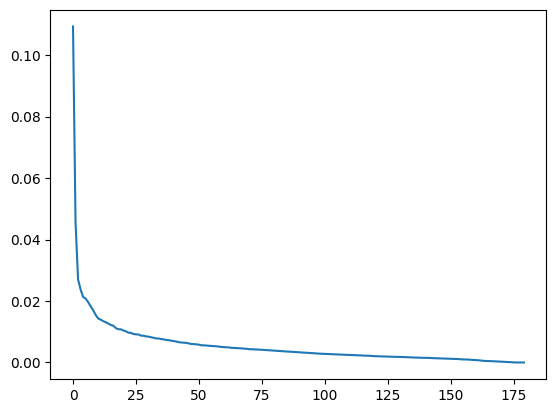

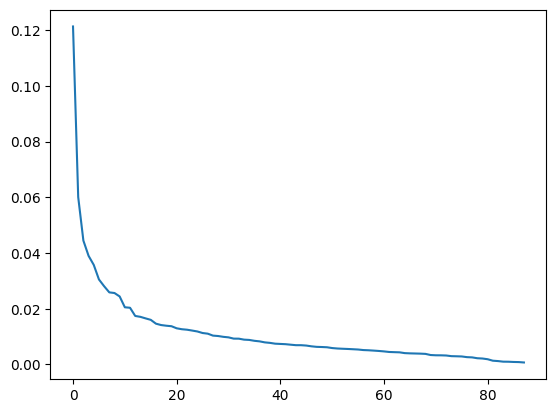

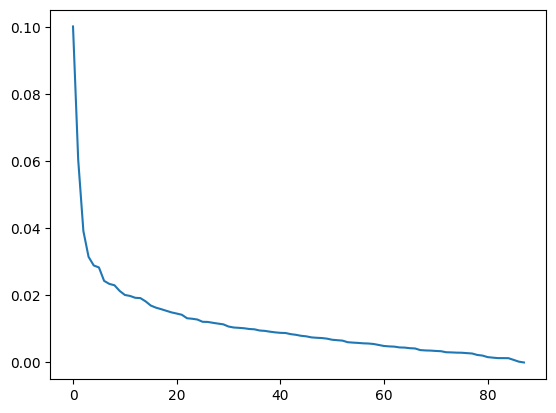

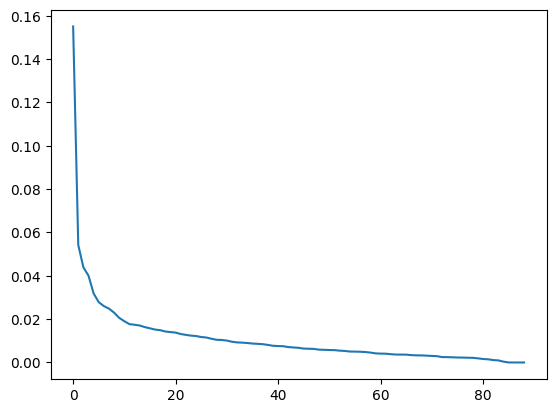

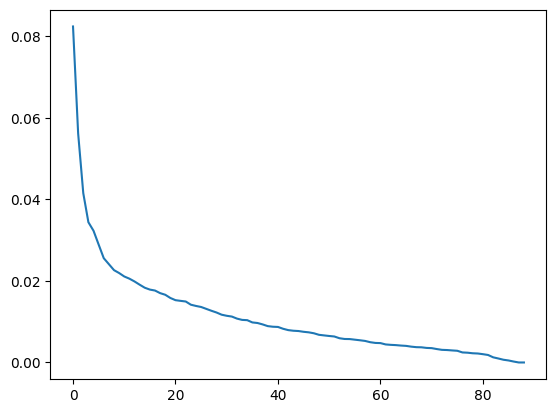

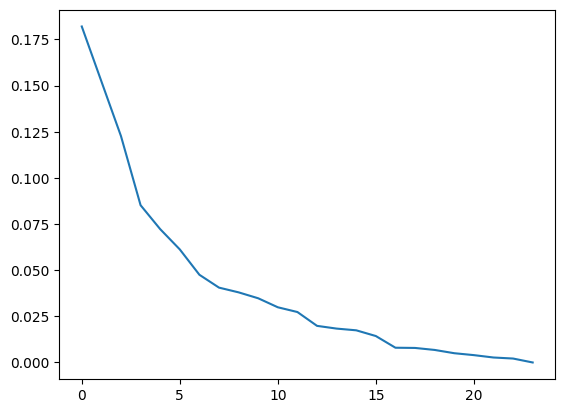

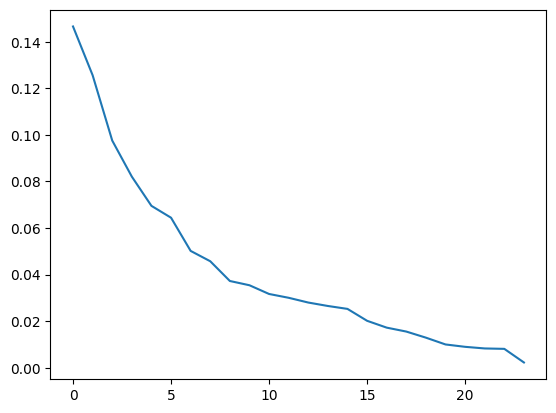

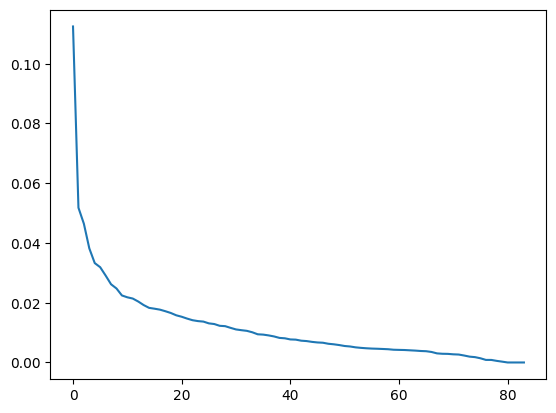

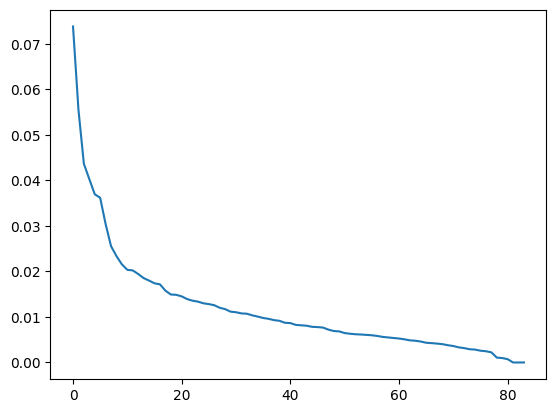

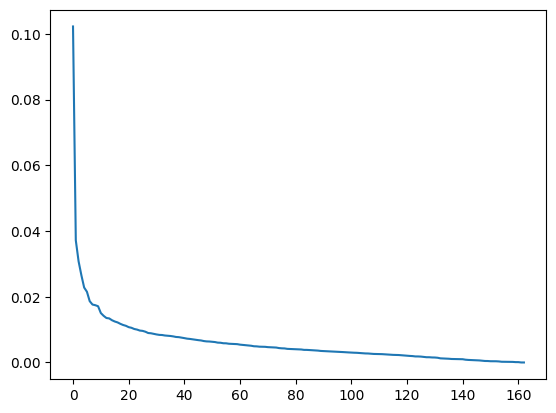

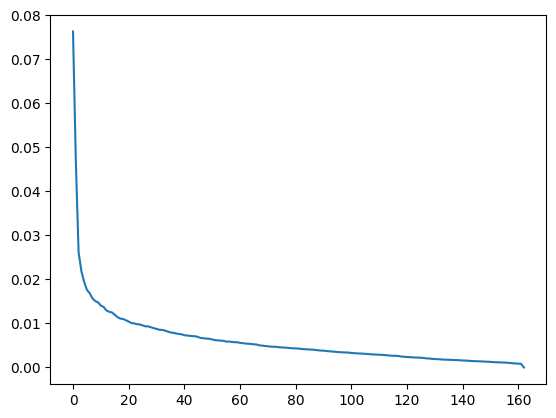

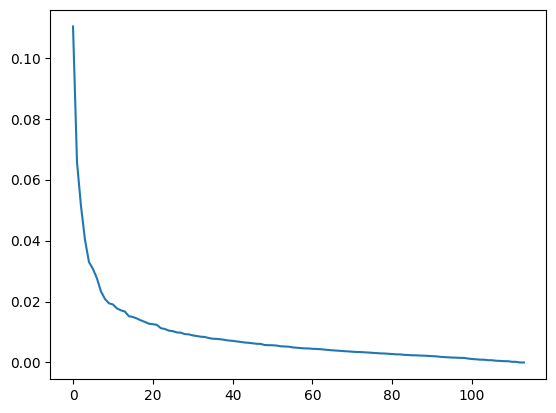

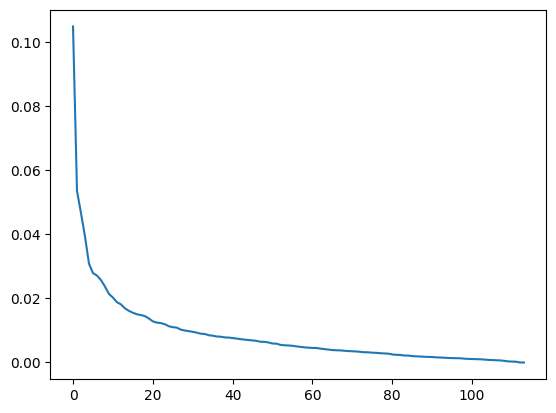

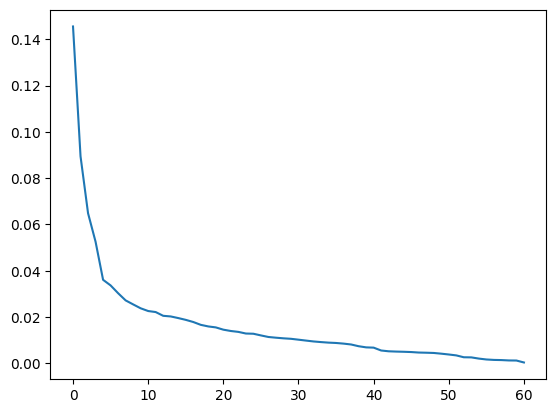

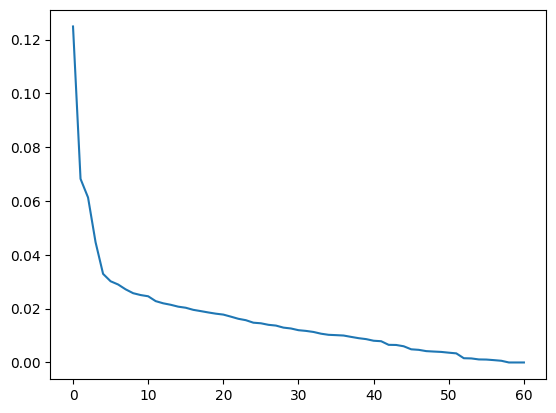

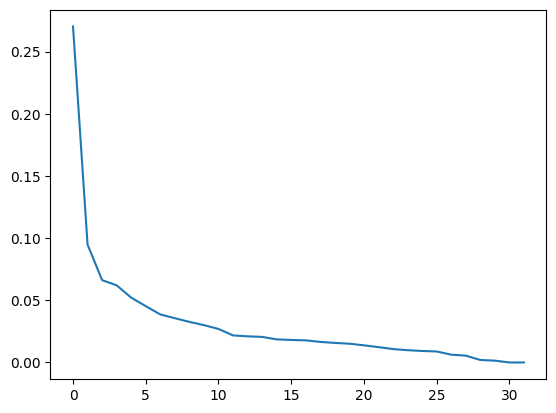

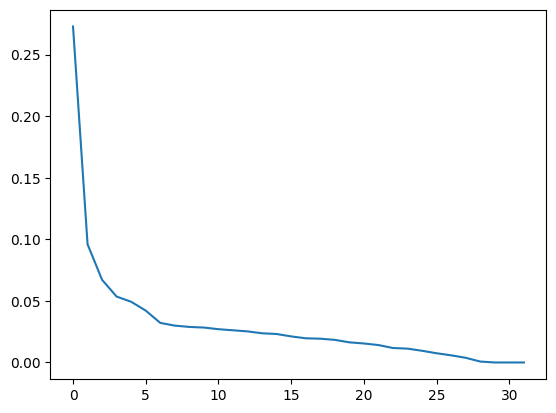

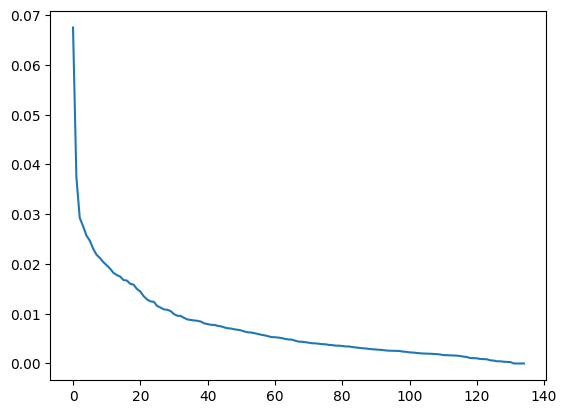

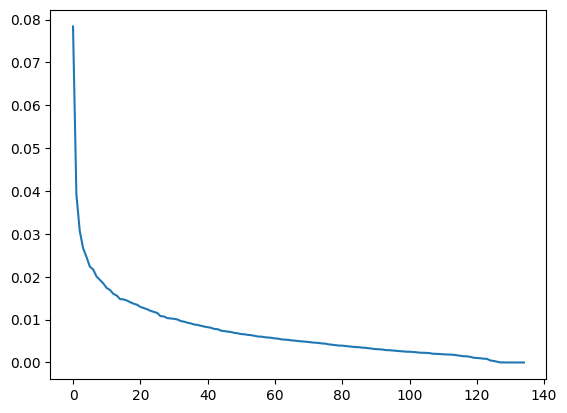

In [78]:
def exponential (x, tau):
        return  np.exp(-x/tau)
variances = []
for idx, session in df_spikes.groupby(['eid']):
    if len(session)<20:
        continue
    dict_var = {'eid': idx}
    for epoch in [0,1]:
        # Deicde on time range to consider (& bin width for spike counts)
        args = {'start': f'spontaneous_start_0{epoch}', 'stop': f'spontaneous_stop_0{epoch}'}

        # Get those timings from the timings dataframe
        for event in args.values():
                session[event] = session['eid'].apply(lambda x: df_timings.loc[x][event])
        # Add dt arg to args dict
        args['dt'] = 0.1
        fig, ax = plt.subplots()
        # Get binned counts for the desired interval for each unit
        sp00_spike_counts = session.apply(_get_binned_spike_counts, **args, axis='columns')
        X = np.column_stack(sp00_spike_counts)  # convert it to 2D array w/ units as columns
        # Min-max normalize
        scaler = MinMaxScaler()
        X_norm = scaler.fit_transform(X)
        # PCA
        pca = PCA()
        pca.fit(X_norm)
        # Skree plot
        ax.plot(pca.explained_variance_ratio_)
        [tau], _ = scipy.optimize.curve_fit(exponential, np.arange(pca.n_components_), pca.explained_variance_ratio_/pca.explained_variance_ratio_[0])

        dict_var[f'pc1_{epoch}'] = pca.explained_variance_ratio_[0]
        dict_var[f'pcs_{epoch}'] = pca.explained_variance_ratio_
        dict_var[f'tau_{epoch}'] = tau
        dict_var[f'ngsc_{epoch}'] = entropy(pca.explained_variance_ratio_) / np.log2(pca.n_components_)
    variances.append (dict_var)

In [98]:
from scipy.special import entr
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

def exponential(x, tau):
    return np.exp(-x/tau)

variances = []

# List of tuples (time after start, time after end) for each time window
time_windows = [(300, 900), (600, 1200)]  # Add more tuples as necessary
five_min = 300

for idx, session in df_spikes.groupby(['eid']):
    print(idx)
    if len(session) < 20:
        continue
    spontaneous_00_start = df_timings.loc[idx, f'spontaneous_start_00']
    spontaneous_00_stop  = df_timings.loc[idx, f'spontaneous_stop_00']
    spontaneous_01_start = df_timings.loc[idx, f'spontaneous_start_01']
    spontaneous_01_stop  = df_timings.loc[idx, f'spontaneous_stop_01']

    task_replay_00_start = df_timings.loc[idx, f'rfm_stop_00']      #USING RFM_STOP INSTEAD OF REPLAY_START
    task_replay_00_stop  = df_timings.loc[idx, f'replay_stop_00']
    task_replay_01_start = df_timings.loc[idx, f'rfm_stop_01']      #USING RFM_STOP INSTEAD OF REPLAY_START
    task_replay_01_stop  = df_timings.loc[idx, f'replay_stop_01']
   
    post_LSD_00_start    = df_timings.loc[idx, 'admin_time'] + 0*(five_min)
    post_LSD_00_stop     = df_timings.loc[idx, 'admin_time'] + 1*(five_min)
    post_LSD_01_start    = df_timings.loc[idx, 'admin_time'] + 1*(five_min)
    post_LSD_01_stop     = df_timings.loc[idx, 'admin_time'] + 2*(five_min)
    post_LSD_02_start    = df_timings.loc[idx, 'admin_time'] + 2*(five_min)
    post_LSD_02_stop     = df_timings.loc[idx, 'admin_time'] + 3*(five_min)
    post_LSD_03_start    = df_timings.loc[idx, 'admin_time'] + 3*(five_min)
    post_LSD_03_stop     = df_timings.loc[idx, 'admin_time'] + 4*(five_min)
    post_LSD_04_start    = df_timings.loc[idx, 'admin_time'] + 4*(five_min)
    post_LSD_04_stop     = df_timings.loc[idx, 'admin_time'] + 5*(five_min)
    post_LSD_05_start    = df_timings.loc[idx, 'admin_time'] + 5*(five_min)
    post_LSD_05_stop     = df_timings.loc[idx, 'admin_time'] + 6*(five_min)

    comparisons = {
        'First spontaneous activity vs. Second spontaneous activity'             : [[spontaneous_00_start, spontaneous_00_stop], [spontaneous_01_start, spontaneous_01_stop]],
        'First spontaneous activity vs. First task replay'                       : [[spontaneous_00_start, spontaneous_00_stop], [task_replay_00_start, task_replay_00_stop]],
        'First spontaneous activity vs. 0-5 minutes after LSD administration'    : [[spontaneous_00_start, spontaneous_00_stop], [post_LSD_00_start, post_LSD_00_stop]],
        'First spontaneous activity vs. 5-10 minutes after LSD administration'   : [[spontaneous_00_start, spontaneous_00_stop], [post_LSD_01_start, post_LSD_01_stop]],
        'First spontaneous activity vs. 10-15 minutes after LSD administration'  : [[spontaneous_00_start, spontaneous_00_stop], [post_LSD_02_start, post_LSD_02_stop]],
        'First spontaneous activity vs. 15-20 minutes after LSD administration'  : [[spontaneous_00_start, spontaneous_00_stop], [post_LSD_03_start, post_LSD_03_stop]],
        'First spontaneous activity vs. 20-25 minutes after LSD administration'  : [[spontaneous_00_start, spontaneous_00_stop], [post_LSD_04_start, post_LSD_04_stop]],
        'First spontaneous activity vs. 25-30 minutes after LSD administration'  : [[spontaneous_00_start, spontaneous_00_stop], [post_LSD_05_start, post_LSD_05_stop]],
        'First spontaneous activity vs. Second task replay'                      : [[spontaneous_00_start, spontaneous_00_stop], [task_replay_01_start, task_replay_01_stop]],
        'First task replay vs. Second task replay'                               : [[task_replay_00_start, task_replay_00_stop], [task_replay_01_start, task_replay_01_stop]],
        'First task replay vs. Second spontaneous activity'                      : [[task_replay_00_start, task_replay_00_stop], [spontaneous_01_start, spontaneous_01_stop]]
    }

    dict_var = {'eid': idx}
    dict_var = {'timings': comparisons}

    for comparison in comparisons:
        print (comparison)
        for time_window in comparisons[comparison]:
            start_time = time_window[0]
            end_time = time_window[1]
            args = {'start': start_time, 'stop': end_time, 'dt': 0.1}

            # Get binned counts for the desired interval for each unit
            sp00_spike_counts = session.apply(_get_binned_spike_counts, **args, axis='columns')
            X = np.column_stack(sp00_spike_counts)  # convert it to 2D array w/ units as columns
            print (X.shape)
            # Min-max normalize
            scaler = MinMaxScaler()
            X_norm = scaler.fit_transform(X)

            # PCA
            pca = PCA()
            pca.fit(X_norm)

            # Skree plot
            # fig, ax = plt.subplots()
            # ax.plot(pca.explained_variance_ratio_)
            [tau], _ = scipy.optimize.curve_fit(exponential, np.arange(pca.n_components_), pca.explained_variance_ratio_/pca.explained_variance_ratio_[0])

            # Save the results
            window_str = f'{time_window[0]}_{time_window[1]}'
            dict_var[f'pc1_{comparison}_{window_str}'] = pca.explained_variance_ratio_[0]
            dict_var[f'pcs_{comparison}_{window_str}'] = pca.explained_variance_ratio_
            dict_var[f'tau_{comparison}_{window_str}'] = tau
            dict_var[f'ngsc_{comparison}_{window_str}'] = entr(pca.explained_variance_ratio_) / np.log2(pca.n_components_)

    variances.append(dict_var)

/tmp/ipykernel_6967/3855887996.py:17: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for idx, session in df_spikes.groupby(['eid']):


4b398979-c54c-498f-a3d4-b201c2285be5
First spontaneous activity vs. Second spontaneous activity
(3001, 243)
(3001, 243)
First spontaneous activity vs. First task replay
(3001, 243)
(3433, 243)
First spontaneous activity vs. 0-5 minutes after LSD administration
(3001, 243)
(3000, 243)
First spontaneous activity vs. 5-10 minutes after LSD administration
(3001, 243)
(3000, 243)
First spontaneous activity vs. 10-15 minutes after LSD administration
(3001, 243)
(3000, 243)
First spontaneous activity vs. 15-20 minutes after LSD administration
(3001, 243)
(3000, 243)
First spontaneous activity vs. 20-25 minutes after LSD administration
(3001, 243)
(3000, 243)
First spontaneous activity vs. 25-30 minutes after LSD administration
(3001, 243)
(3000, 243)
First spontaneous activity vs. Second task replay
(3001, 243)
(3434, 243)
First task replay vs. Second task replay
(3433, 243)
(3434, 243)
First task replay vs. Second spontaneous activity
(3433, 243)
(3001, 243)
53d8cb2f-3338-4bcd-81c4-6207b660e

/home/openlab/anaconda3/envs/iblenv/lib/python3.10/site-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/openlab/anaconda3/envs/iblenv/lib/python3.10/site-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [58]:
df_pca = pd.DataFrame (variances)
df_pca

,eid,pc1_0,pcs_0,tau_0,ngsc_0,pc1_1,pcs_1,tau_1,ngsc_1
0,2583567d-cd2a-485a-8d79-85aa619e1ce2,0.069378,"[0.06937779221478285, 0.05076216197920999, 0.0...",9.619551,0.617041,0.093878,"[0.0938782613919209, 0.04618138124779089, 0.04...",4.785247,0.614474
1,4b398979-c54c-498f-a3d4-b201c2285be5,0.090169,"[0.09016874725738314, 0.030486227844660152, 0....",1.874052,0.620887,0.077094,"[0.07709400655732306, 0.028556737789095694, 0....",1.960444,0.629926
2,53d8cb2f-3338-4bcd-81c4-6207b660eba3,0.117533,"[0.11753342951009493, 0.053848773412875, 0.031...",2.115725,0.599263,0.109288,"[0.10928846257837745, 0.045699341119870326, 0....",1.976459,0.608609
3,6dc3fee9-6bfc-4daf-a70f-d726ac2fcfde,0.121324,"[0.12132351136814673, 0.060089485344228345, 0....",3.691751,0.612967,0.100121,"[0.10012094272383576, 0.06040208529384717, 0.0...",4.594995,0.626412
4,7149e0fc-a52d-4e93-849c-edc22d54e7a5,0.155059,"[0.15505899080729435, 0.05421295903568079, 0.0...",1.993979,0.598409,0.082375,"[0.08237514688510388, 0.05616835111328005, 0.0...",7.654071,0.627931
5,86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a,0.181994,"[0.1819944255080467, 0.1522917255178252, 0.122...",4.886425,0.570231,0.146544,"[0.14654403194477553, 0.1256183832651116, 0.09...",6.340037,0.616117
6,996f3585-b804-4a3d-878a-1c15d708962b,0.112471,"[0.11247149199792529, 0.051796395448585844, 0....",4.358550,0.613669,0.073808,"[0.07380780816934739, 0.05553123120014943, 0.0...",9.827918,0.632011
7,a6b9f254-7682-47a4-9abd-753013c87c70,0.102217,"[0.10221721914722816, 0.03715179776458228, 0.0...",2.308826,0.615713,0.076334,"[0.07633358392210697, 0.04714495353711652, 0.0...",3.654653,0.635455
8,a7a4a70f-57ae-4586-bb2d-37422deca541,0.110264,"[0.1102636541380567, 0.06568595819704702, 0.05...",4.254512,0.598470,0.104925,"[0.1049249313761233, 0.053555848108771835, 0.0...",4.491552,0.603181
9,d77dd225-f7a9-4d01-996b-82c3ae73d56c,0.145554,"[0.1455539093008191, 0.08943795780509416, 0.06...",3.688915,0.598206,0.124858,"[0.12485756586851222, 0.06823604235406372, 0.0...",4.356028,0.613429


TtestResult(statistic=2.3039862296483764, pvalue=0.04173815556867928, df=11)


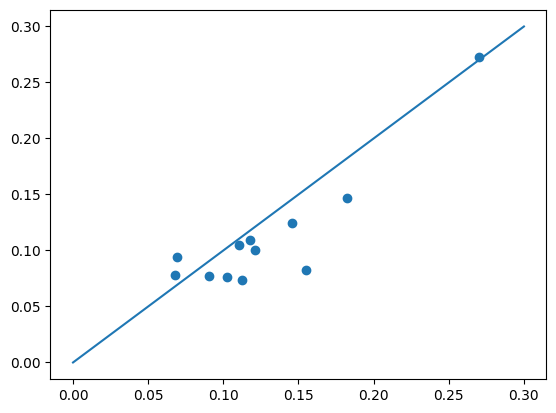

In [59]:
df_pca
plt.scatter(df_pca['pc1_0'], df_pca['pc1_1'])
plt.plot ([0,0.3], [0,0.3])
print(scipy.stats.ttest_rel(df_pca['pc1_0'], df_pca['pc1_1']))

In [41]:
import scipy
scipy.stats.ttest_rel?

Signature:
scipy.stats.ttest_rel(
    a,
    b,
    axis=0,
    nan_policy='propagate',
    alternative='two-sided',
    *,
    keepdims=False,
)
Docstring:
Calculate the t-test on TWO RELATED samples of scores, a and b.

This is a test for the null hypothesis that two related or
repeated samples have identical average (expected) values.

Parameters
----------
a, b : array_like
    The arrays must have the same shape.
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
nan_policy : {'propagate', 'omit', 'raise'}
    Defines how to handle input NaNs.
    
    - ``propagate``: if a NaN is present in the axis slice (e.g. row) along
      which the  statistic is computed, the corresponding entry of the output
      will be NaN.
    - ``omit``: Na

In [60]:
scipy.stats.ttest_rel(df_pca['tau_0'], df_pca['tau_1'])

TtestResult(statistic=-0.672361725772232, pvalue=0.5152282396745997, df=11)

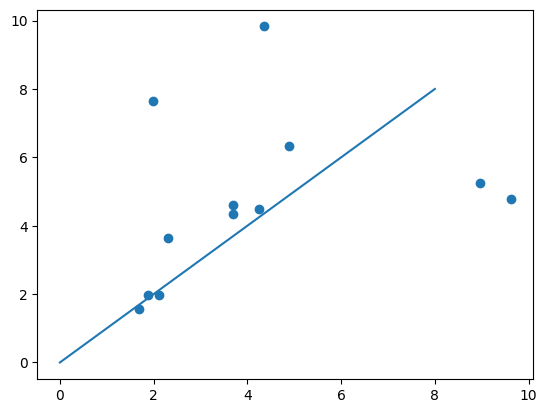

In [61]:
df_pca
plt.scatter(df_pca['tau_0'], df_pca['tau_1'])
plt.plot ([0,8], [0,8])

TtestResult(statistic=-3.4716734115833976, pvalue=0.0052245378131692815, df=11)


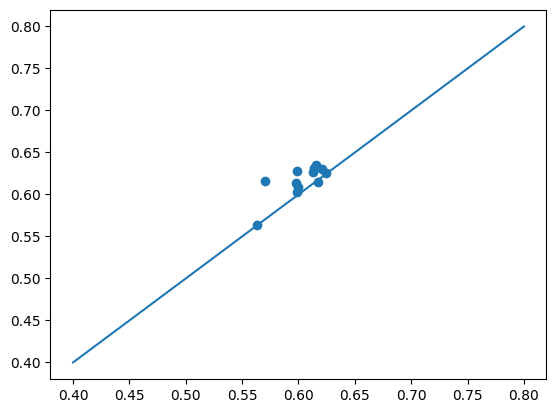

In [62]:
plt.scatter(df_pca['ngsc_0'], df_pca['ngsc_1'])
plt.plot ([0.4,0.8], [0.4,0.8])
print(scipy.stats.ttest_rel(df_pca['ngsc_0'], df_pca['ngsc_1']))

TtestResult(statistic=-3.4716734115833976, pvalue=0.0052245378131692815, df=11)
0     0.617041
1     0.620887
2     0.599263
3     0.612967
4     0.598409
5     0.570231
6     0.613669
7     0.615713
8     0.598470
9     0.598206
10    0.563417
11    0.624651
Name: ngsc_0, dtype: float64 0     0.614474
1     0.629926
2     0.608609
3     0.626412
4     0.627931
5     0.616117
6     0.632011
7     0.635455
8     0.603181
9     0.613429
10    0.563886
11    0.626042
Name: ngsc_1, dtype: float64


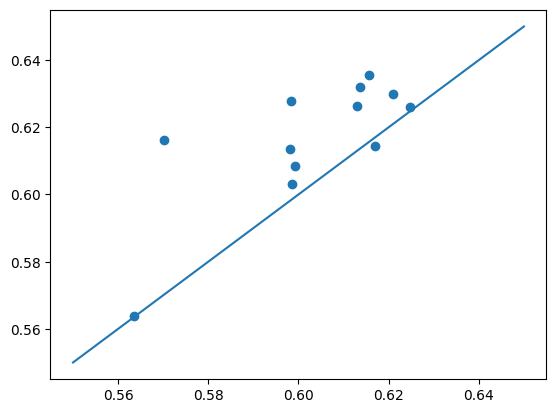

In [63]:
plt.scatter(df_pca['ngsc_0'], df_pca['ngsc_1'])
plt.plot ([0.55,0.65], [0.55,0.65])
print(scipy.stats.ttest_rel(df_pca['ngsc_0'], df_pca['ngsc_1']))
print(df_pca['ngsc_0'], df_pca['ngsc_1'])

In [ ]:

                                              



# Calculate power-law fit alpha for each dataset
[alpha_00, b00], _ = scipy.optimize.curve_fit(exponential, np.arange(1,len(explained_variance_00)+1), explained_variance_00) 
[alpha_01, b01], _ = scipy.optimize.curve_fit(exponential, np.arange(1,len(explained_variance_01)+1), explained_variance_01)
